In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
! ls

gdrive	sample_data


In [3]:
%cd /content/gdrive/MyDrive/CZ4045_A2_Text_Generation/

/content/gdrive/.shortcut-targets-by-id/1D7dawxnLHNWtPdNvZY4sIRIt7yL0qNeV/CZ4045_A2_Text_Generation


In [6]:
import pandas as pd
rms_tied = pd.read_csv('./logs/FNN_rmsprop_tied.csv')
rms_non_tied = pd.read_csv('./logs/FNN_rmsprop_not-tied.csv')
adam_tied = pd.read_csv('./logs/FNN_adam_tied.csv')
adam_non_tied = pd.read_csv('./logs/FNN_adam_not-tied.csv')

rms_tied_lstm = pd.read_csv('./logs/LSTM_rmsprop_tied.csv')
rms_non_tied_lstm = pd.read_csv('./logs/LSTM_rmsprop_not-tied.csv')
adam_tied_lstm = pd.read_csv('./logs/LSTM_adam_tied.csv')
adam_non_tied_lstm = pd.read_csv('./logs/LSTM_adam_not-tied.csv')

rms_tran = pd.read_csv('./logs/Transformer_rmsprop_not-tied.csv')
adam_tran = pd.read_csv('./logs/Transformer_adam_not-tied.csv')

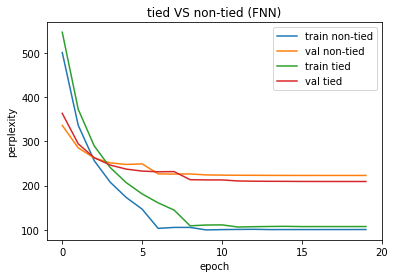

In [ ]:
import matplotlib.pyplot as plt
plt.plot(adam_non_tied['train_perplexity'])
plt.plot(adam_non_tied['val_perplexity'])
plt.plot(adam_tied['train_perplexity'])
plt.plot(adam_tied['val_perplexity'])
plt.title('tied VS non-tied (FNN)')
plt.ylabel('perplexity')
plt.xlabel('epoch')
plt.xticks([0, 5, 10, 15, 20])
plt.legend(["train non-tied","val non-tied", "train tied", "val tied"], loc='upper right')

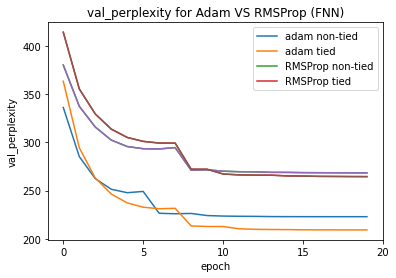

In [ ]:
import matplotlib.pyplot as plt

plt.plot(adam_non_tied['val_perplexity'])
plt.plot(adam_tied['val_perplexity'])
plt.plot(rms_non_tied['val_perplexity'])
plt.plot(rms_tied['val_perplexity'])
plt.plot(rms_non_tied['val_perplexity'])
plt.plot(rms_tied['val_perplexity'])
plt.title("val_perplexity for Adam VS RMSProp (FNN)")
plt.xlabel("epoch")
plt.ylabel("val_perplexity")
plt.xticks([0, 5, 10, 15, 20])
plt.legend(["adam non-tied","adam tied","RMSProp non-tied","RMSProp tied"], loc='upper right')

In [ ]:
pd.DataFrame({
    "non-tied": [sum(adam_non_tied['time'])/20],
    "tied": [sum(adam_tied['time'])/20]
})

,non-tied,tied
0,114.293752,101.445164


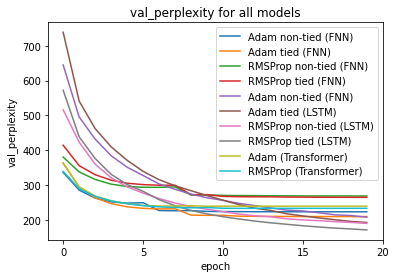

In [ ]:
import matplotlib.pyplot as plt

plt.plot(adam_non_tied['val_perplexity'])
plt.plot(adam_tied['val_perplexity'])
plt.plot(rms_non_tied['val_perplexity'])
plt.plot(rms_tied['val_perplexity'])

plt.plot(adam_non_tied_lstm['val_perplexity'])
plt.plot(adam_tied_lstm['val_perplexity'])
plt.plot(rms_non_tied_lstm['val_perplexity'])
plt.plot(rms_tied_lstm['val_perplexity'])

plt.plot(adam_tran['val_perplexity'])
plt.plot(rms_tran['val_perplexity'])

plt.title("val_perplexity for all models")
plt.xlabel("epoch")
plt.ylabel("val_perplexity")
plt.xticks([0, 5, 10, 15, 20])
plt.legend(["Adam non-tied (FNN)","Adam tied (FNN)","RMSProp non-tied (FNN)","RMSProp tied (FNN)", 
            "Adam non-tied (FNN)","Adam tied (LSTM)","RMSProp non-tied (LSTM)","RMSProp tied (LSTM)",
            "Adam (Transformer)", "RMSProp (Transformer)"], loc='upper right')


In [ ]:
!python main.py --epoch 20 --emsize 200 --nhid 200 --batch_size 512 --lr 4e-4 --cuda --model Transformer

 ########## TRAIN MODEL ########## 
Model: Transformer, Ngram size: 8, Tied Weights: False, CUDA: True, nhid: 200, emsize: 200, Epochs: 20, LR: 0.0004, Optimizer: adam
converting training data...
converting val data...
converting test data...
Transformer model created
Total Trainable params:  12010745

--- Training model Epoch: 1 ---
| epoch   1 |   200/  481 batches | lr 4.00e-04 | ms/batch 180.43 | loss  7.17 | ppl  1302.65
| epoch   1 |   400/  481 batches | lr 4.00e-04 | ms/batch 176.69 | loss  6.37 | ppl   584.91

--- Evaluating model on dev data ---
-----------------------------------------------------------------------------------------
| end of epoch   1 | time: 88.80s | valid loss  5.89 | valid ppl   361.93
-----------------------------------------------------------------------------------------
Best development perplexity improved from 9223372036854775808.00 to   361.93, saving model to ./models/Transformer_adam_not-tied.dat

--- Training model Epoch: 2 ---
| epoch   2 |   20

In [ ]:
!python main.py --epoch 20 --emsize 200 --nhid 200 --batch_size 512 --lr 4e-4 --cuda --model Transformer --optim rmsprop 

 ########## TRAIN MODEL ########## 
Model: Transformer, Ngram size: 8, Tied Weights: False, CUDA: True, nhid: 200, emsize: 200, Epochs: 20, LR: 0.0004, Optimizer: rmsprop
using saved train data
using saved val data
using saved test data
Transformer model created
Total Trainable params:  12010745

--- Training model Epoch: 1 ---
| epoch   1 |   200/  481 batches | lr 4.00e-04 | ms/batch 174.98 | loss  6.68 | ppl   796.47
| epoch   1 |   400/  481 batches | lr 4.00e-04 | ms/batch 174.06 | loss  6.24 | ppl   510.65

--- Evaluating model on dev data ---
-----------------------------------------------------------------------------------------
| end of epoch   1 | time: 86.97s | valid loss  5.83 | valid ppl   339.05
-----------------------------------------------------------------------------------------
Best development perplexity improved from 9223372036854775808.00 to   339.05, saving model to ./models/Transformer_rmsprop_not-tied.dat

--- Training model Epoch: 2 ---
| epoch   2 |   200/ 

In [ ]:
!python main.py --epoch 20 --emsize 200 --nhid 200 --batch_size 512 --lr 4e-4 --cuda --model LSTM

 ########## TRAIN MODEL ########## 
Model: LSTM, Ngram size: 8, Tied Weights: False, CUDA: True, nhid: 200, emsize: 200, Epochs: 20, LR: 0.0004, Optimizer: adam
using saved train data
using saved val data
using saved test data
*TIED WEIGHTS NOT SELECTED*
RNN model created
Total Trainable params:  12169945

--- Training model Epoch: 1 ---
| epoch   1 |   200/  481 batches | lr 4.00e-04 | ms/batch 167.97 | loss  7.53 | ppl  1854.06
| epoch   1 |   400/  481 batches | lr 4.00e-04 | ms/batch 166.88 | loss  7.00 | ppl  1099.99

--- Evaluating model on dev data ---
-----------------------------------------------------------------------------------------
| end of epoch   1 | time: 83.47s | valid loss  6.47 | valid ppl   645.03
-----------------------------------------------------------------------------------------
Best development perplexity improved from 9223372036854775808.00 to   645.03, saving model to ./models/LSTM_adam_not-tied.dat

--- Training model Epoch: 2 ---
| epoch   2 |   200/ 

In [ ]:
!python main.py --epoch 20 --emsize 200 --nhid 200 --batch_size 512 --lr 4e-4 --cuda --tied --model LSTM

 ########## TRAIN MODEL ########## 
Model: LSTM, Ngram size: 8, Tied Weights: True, CUDA: True, nhid: 200, emsize: 200, Epochs: 20, LR: 0.0004, Optimizer: adam
using saved train data
using saved val data
using saved test data
*TIED WEIGHTS SELECTED*
RNN model created
Total Trainable params:  6420945

--- Training model Epoch: 1 ---
| epoch   1 |   200/  481 batches | lr 4.00e-04 | ms/batch 164.47 | loss  7.53 | ppl  1854.64
| epoch   1 |   400/  481 batches | lr 4.00e-04 | ms/batch 163.51 | loss  7.02 | ppl  1123.15

--- Evaluating model on dev data ---
-----------------------------------------------------------------------------------------
| end of epoch   1 | time: 81.74s | valid loss  6.61 | valid ppl   739.04
-----------------------------------------------------------------------------------------
Best development perplexity improved from 9223372036854775808.00 to   739.04, saving model to ./models/LSTM_adam_tied.dat

--- Training model Epoch: 2 ---
| epoch   2 |   200/  481 batch

In [ ]:
!python main.py --epoch 20 --emsize 200 --nhid 200 --batch_size 512 --lr 4e-4 --cuda --model LSTM --optim rmsprop 

In [ ]:
!python main.py --epoch 20 --emsize 200 --nhid 200 --batch_size 512 --lr 4e-4 --cuda --tied --optim rmsprop --model LSTM

In [ ]:
!python main.py --epoch 20 --emsize 200 --nhid 200 --batch_size 512 --lr 4e-4 --cuda --model FNN

In [ ]:
!python main.py --epoch 20 --emsize 200 --nhid 200 --batch_size 512 --lr 4e-4 --cuda --model FNN --optim rmsprop 

In [ ]:
!python main.py --epoch 20 --emsize 200 --nhid 200 --batch_size 512 --lr 4e-4 --cuda --tied

In [ ]:
!python main.py --epoch 20 --emsize 200 --nhid 200 --batch_size 512 --lr 4e-4 --cuda --tied --optim rmsprop

In [5]:
## default input: i like fruits and they include some
!python inference.py --cuda --tied

 ########## GENERATE TEXT ########## 
*TIED WEIGHTS SELECTED*
Next word:  <unk>


In [10]:
!python inference.py --cuda --tied --input 'my dog is brown and loves its'

 ########## GENERATE TEXT ########## 
*TIED WEIGHTS SELECTED*
Next word:  own
